## final project - sep tutorial (4 pngs)

1) Get astropy and install it on your system (pip install astropy).

2) Get sep and install it on your system (pip install sep).

3) Follow the tutorial found at https://sep.readthedocs.io/en/stable/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

4) Augment the tutorial to save each of the four figures to PNG files.

In [7]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

# Load FITS image
from astropy.io import fits

data = fits.getdata("image.fits").astype(float)
data = np.ascontiguousarray(data)

data.shape


(256, 256)

In [10]:
bkg = sep.Background(data)
data_sub = data - bkg

objects = sep.extract(data_sub, thresh=1.5 * bkg.globalrms)
print(len(objects))

68


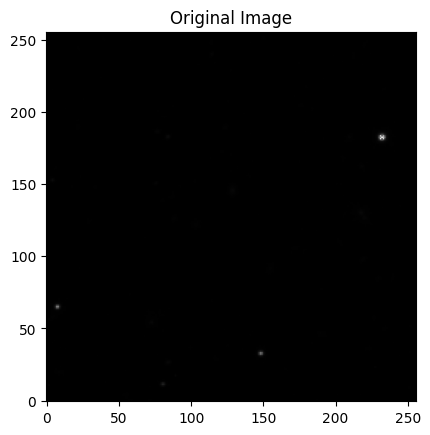

In [11]:
plt.imshow(data, cmap='gray', origin='lower')
plt.title("Original Image")
plt.savefig("tutorial_image.png")
plt.show()


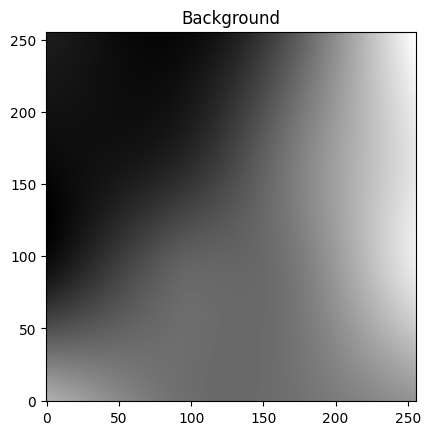

In [12]:
plt.imshow(bkg.back(), cmap='gray', origin='lower')
plt.title("Background")
plt.savefig("tutorial_background.png")
plt.show()


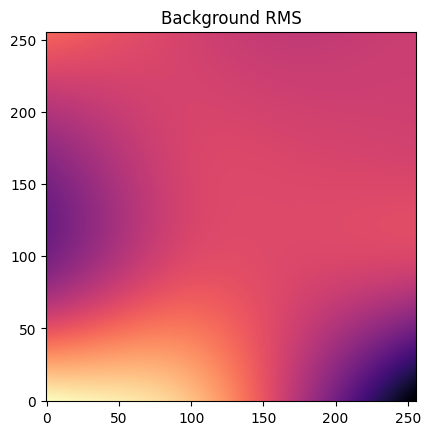

In [13]:
plt.imshow(bkg.rms(), cmap='magma', origin='lower')
plt.title("Background RMS")
plt.savefig("tutorial_rms.png")
plt.show()


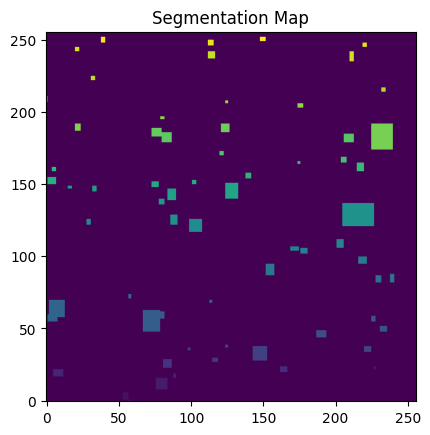

In [14]:
segmap = np.zeros_like(data, dtype=int)
for i, obj in enumerate(objects):
    segmap[obj['ymin']:obj['ymax'], obj['xmin']:obj['xmax']] = i+1

plt.imshow(segmap, origin='lower')
plt.title("Segmentation Map")
plt.savefig("tutorial_segmap.png")
plt.show()


In [19]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [20]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [21]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
